In [1]:
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt 
from arch import arch_model

plt.style.use('bmh')

In [2]:
data = yf.download('^GSPC', period='10y', interval='1d', auto_adjust=True)
data 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2012-03-23,1392.780029,1399.180054,1386.869995,1397.109985,3472950000
2012-03-26,1397.109985,1416.579956,1397.109985,1416.510010,3576950000
2012-03-27,1416.550049,1419.150024,1411.949951,1412.520020,3513640000
2012-03-28,1412.520020,1413.650024,1397.199951,1405.540039,3892800000
2012-03-29,1405.390015,1405.390015,1391.560059,1403.280029,3832000000
...,...,...,...,...,...
2022-03-16,4288.140137,4358.899902,4251.990234,4357.859863,5002240000
2022-03-17,4345.109863,4412.669922,4335.649902,4411.669922,4174170000
2022-03-18,4407.339844,4465.399902,4390.569824,4463.120117,6681510000


In [3]:
returns = 100 * data.Close.apply(np.log).diff(1).dropna()
returns

Date
2012-03-26    1.379030
2012-03-27   -0.282075
2012-03-28   -0.495376
2012-03-29   -0.160922
2012-03-30    0.369161
                ...   
2022-03-16    2.213692
2022-03-17    1.227221
2022-03-18    1.159481
2022-03-21   -0.043475
2022-03-22    1.124070
Name: Close, Length: 2515, dtype: float64

In [4]:
am = arch_model(returns, p=1, o=0, q=1, vol='GARCH', dist='normal')

In [5]:
split_date = returns.index[-500]
split_date

Timestamp('2020-03-30 00:00:00')

In [6]:
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41898.76855882587
Iteration:      2,   Func. Count:     17,   Neg. LLF: 11134.29161331464
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3976.8711524722785
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2496.9608266615323
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2296.305871193574
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2288.0102253108976
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2287.8612741454863
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2287.8612135600893
Iteration:      9,   Func. Count:     63,   Neg. LLF: 2287.861212941293
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2287.861212941293
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9


## Analytical Forecasts

In [7]:
forecasts = res.forecast(horizon=5, method='analytic', start=split_date, reindex=False)
forecasts.variance

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-03-30,18.059582,17.118382,16.228809,15.388031,14.593371
2020-03-31,13.723366,13.020017,12.355249,11.726944,11.133103
2020-04-01,14.674551,13.919028,13.204947,12.530034,11.892142
2020-04-02,11.696576,11.104401,10.544708,10.015716,9.515740
2020-04-03,9.066384,8.618481,8.195147,7.795033,7.416867
...,...,...,...,...,...
2022-03-16,2.713862,2.614409,2.520411,2.431570,2.347601
2022-03-17,2.301185,2.224368,2.151765,2.083145,2.018288
2022-03-18,1.969730,1.911094,1.855675,1.803296,1.753789


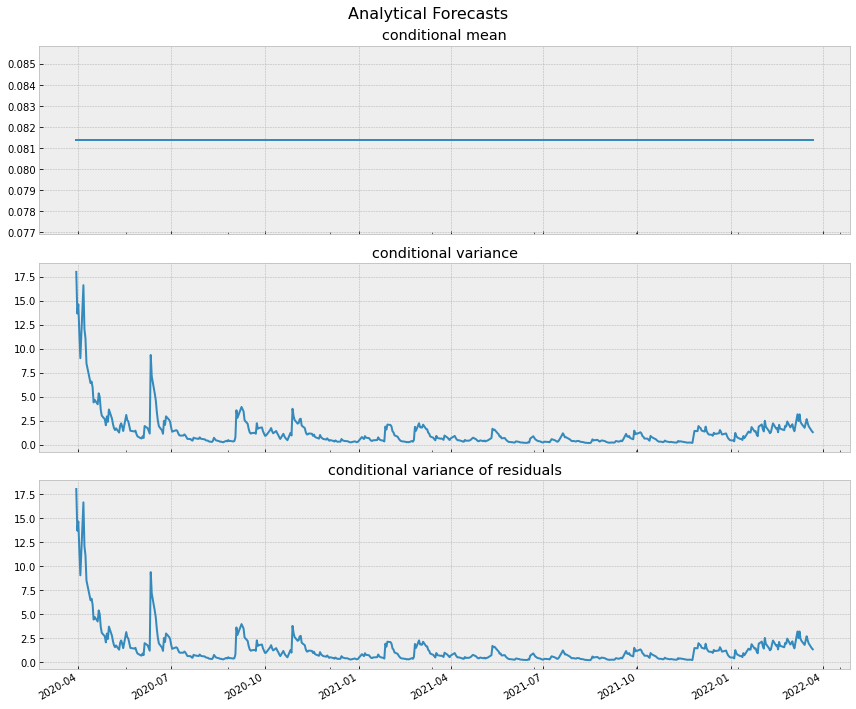

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12,10), sharex=True)

forecasts.mean['h.1'].plot(ax=ax[0])
ax[0].set_title("conditional mean")

forecasts.variance['h.1'].plot(ax=ax[1])
ax[1].set_title("conditional variance")

forecasts.residual_variance['h.1'].plot(ax=ax[2])
ax[2].set_title("conditional variance of residuals")

fig.suptitle("Analytical Forecasts", fontsize=16)
plt.xlabel('')
plt.tight_layout()
plt.show()

## Simulation Forecasts

In [9]:
forecasts = res.forecast(horizon=5, method='simulation', start=split_date, reindex=False)
forecasts.variance

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-03-30,18.059582,17.115210,16.072096,15.269076,14.675396
2020-03-31,13.723366,12.765346,12.232799,11.404098,10.822625
2020-04-01,14.674551,13.936014,13.049706,12.385554,11.591655
2020-04-02,11.696576,11.091940,10.418525,9.889695,9.373906
2020-04-03,9.066384,8.591214,8.230425,7.763280,7.387309
...,...,...,...,...,...
2022-03-16,2.713862,2.563746,2.498798,2.477090,2.405346
2022-03-17,2.301185,2.247622,2.152488,2.094191,2.006498
2022-03-18,1.969730,1.902323,1.831164,1.767688,1.694887


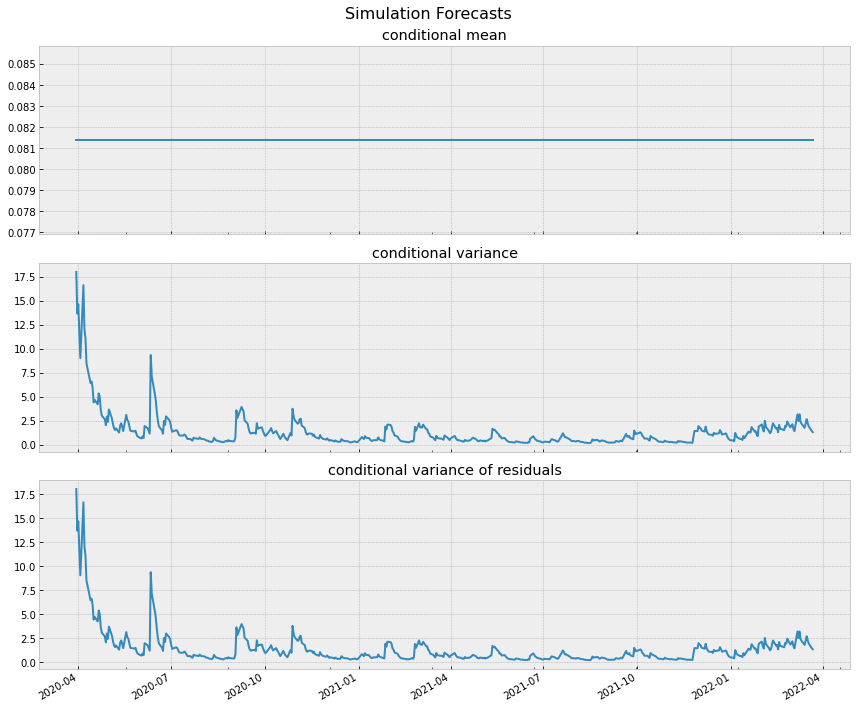

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(12,10), sharex=True)

forecasts.mean['h.1'].plot(ax=ax[0])
ax[0].set_title("conditional mean")

forecasts.variance['h.1'].plot(ax=ax[1])
ax[1].set_title("conditional variance")

forecasts.residual_variance['h.1'].plot(ax=ax[2])
ax[2].set_title("conditional variance of residuals")

fig.suptitle("Simulation Forecasts", fontsize=16)
plt.xlabel('')
plt.tight_layout()
plt.show()

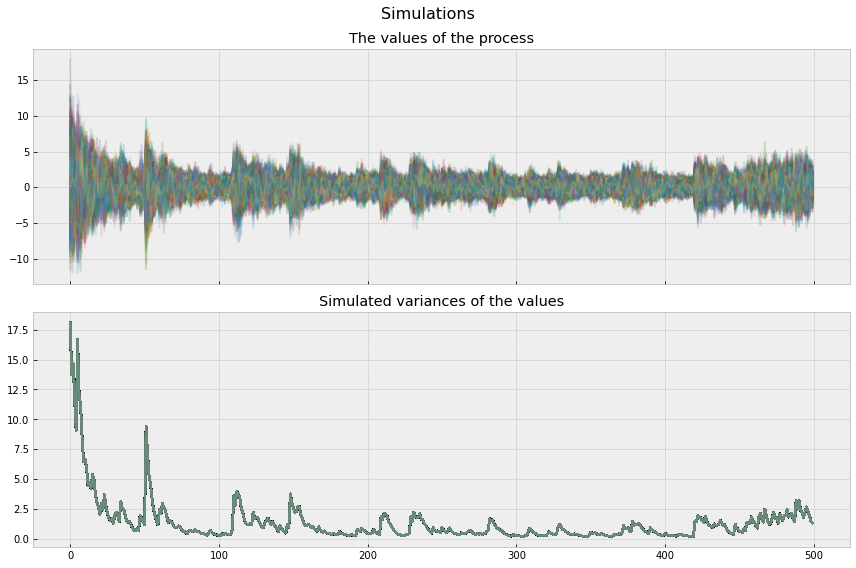

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(12,8),sharex=True)

ax[0].plot(forecasts.simulations.values[:,:,0], alpha=0.2)
ax[0].set_title("The values of the process")

ax[1].plot(forecasts.simulations.variances[:,:,0], alpha=0.2)
ax[1].set_title("Simulated variances of the values")

fig.suptitle("Simulations", fontsize=16)
plt.tight_layout()
plt.show()

## Bootstrap Forecasts

In [12]:
forecasts = res.forecast(horizon=5, method='bootstrap', start=split_date, reindex=False)
forecasts.variance

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-03-30,18.059582,16.629906,15.750903,14.814472,14.573153
2020-03-31,13.723366,13.019410,12.524782,11.665184,11.328249
2020-04-01,14.674551,14.002344,13.211177,12.663283,11.773121
2020-04-02,11.696576,11.388191,10.664554,9.795628,9.211708
2020-04-03,9.066384,8.386361,8.338090,7.800339,7.403193
...,...,...,...,...,...
2022-03-16,2.713862,2.673440,2.633447,2.652325,2.546761
2022-03-17,2.301185,2.298539,2.172873,2.154256,2.143195
2022-03-18,1.969730,1.918277,1.917004,1.910633,1.832455


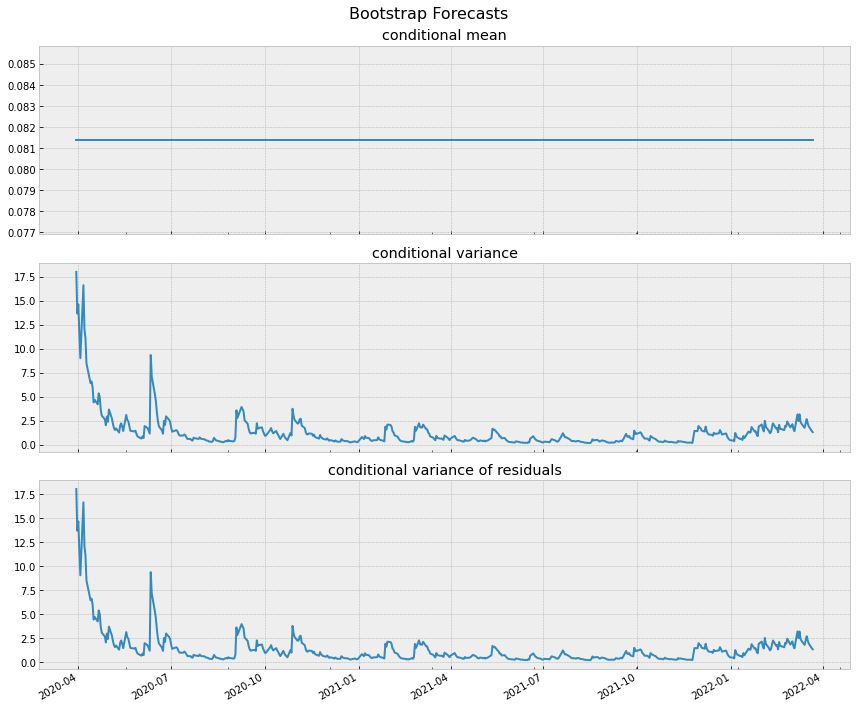

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(12,10), sharex=True)

forecasts.mean['h.1'].plot(ax=ax[0])
ax[0].set_title("conditional mean")

forecasts.variance['h.1'].plot(ax=ax[1])
ax[1].set_title("conditional variance")

forecasts.residual_variance['h.1'].plot(ax=ax[2])
ax[2].set_title("conditional variance of residuals")

fig.suptitle("Bootstrap Forecasts", fontsize=16)
plt.xlabel('')
plt.tight_layout()
plt.show()

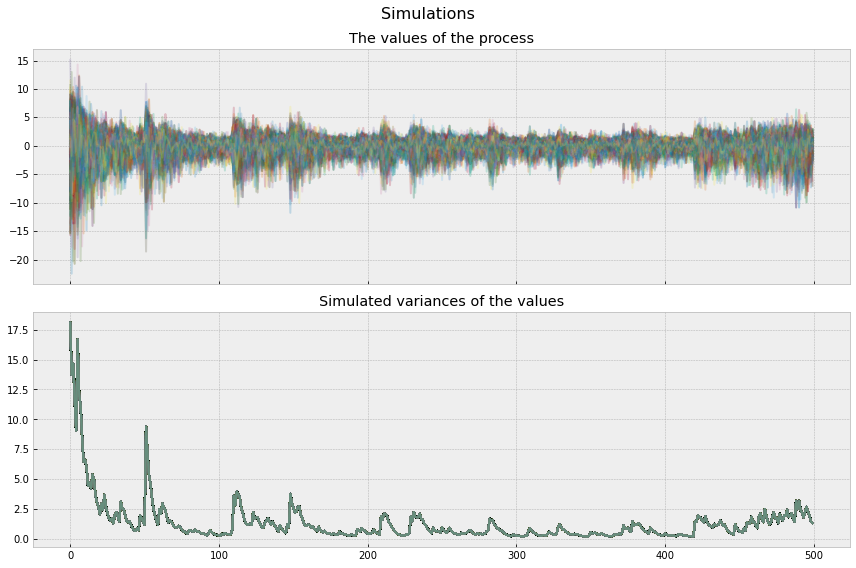

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(12,8),sharex=True)

ax[0].plot(forecasts.simulations.values[:,:,0], alpha=0.2)
ax[0].set_title("The values of the process")

ax[1].plot(forecasts.simulations.variances[:,:,0], alpha=0.2)
ax[1].set_title("Simulated variances of the values")

fig.suptitle("Simulations", fontsize=16)
plt.tight_layout()
plt.show()